A new dataset named website contains simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (time_seconds), their age (age), and information about whether they accessed the website using Chrome or Safari (browser).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


1. Create a plot of time_seconds (vertical axis) versus age (horizontal axis). Is there a linear relationship between these variables?

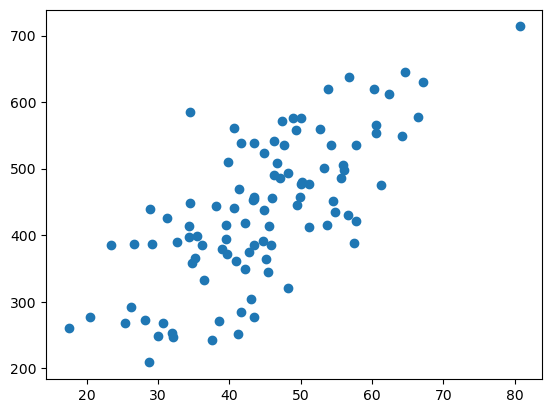

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(website.age, website.time_seconds)
plt.show()
plt.clf()

2. Fit a linear model to predict time_seconds using the age variable

In [4]:
model = sm.OLS.from_formula("time_seconds ~ age", website)
results = model.fit()
print(results.params)

Intercept    128.967945
age            6.913758
dtype: float64


3. Use the coefficients from the linear model to plot the regression line on top of your original plot.

C:\Users\filip\AppData\Local\Temp\ipykernel_15288\2286103946.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(website.age, results.params[1]*website.age + results.params[0])


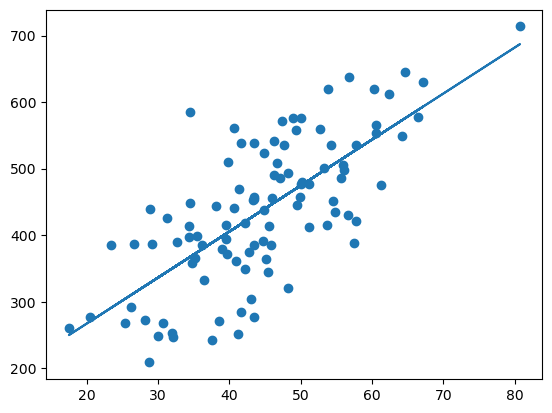

In [5]:
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[1]*website.age + results.params[0])

4. Calculate the fitted values and residuals

In [6]:
fitted_values = results.predict(website)
print(fitted_values.head())

0    454.605928
1    575.596686
2    442.852540
3    366.801206
4    345.368558
dtype: float64


In [7]:
residuals = website.time_seconds - fitted_values
print(residuals.head())

0    31.394072
1    70.103314
2   -97.852540
3    46.598794
4    81.031442
dtype: float64


5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?

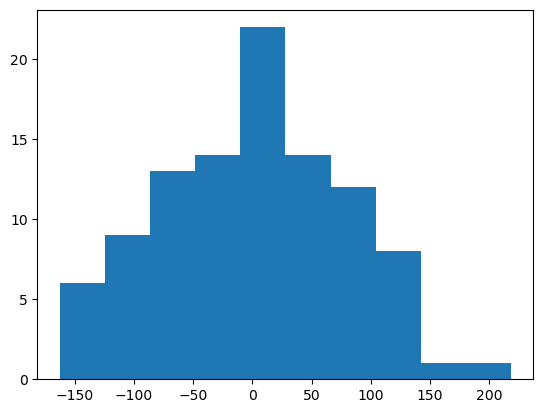

<Figure size 640x480 with 0 Axes>

In [9]:
plt.hist(residuals)
plt.show()
plt.clf()

6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?

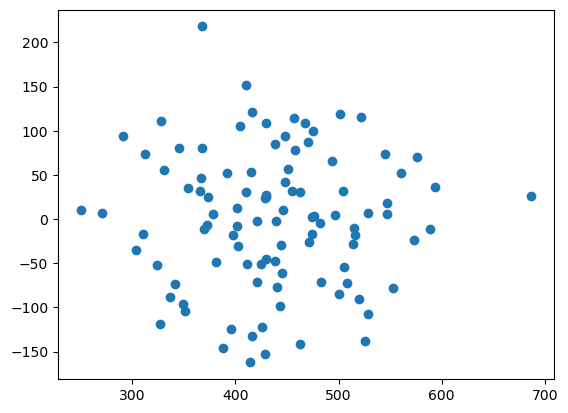

<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()

7. Use your model to predict the amount of time that a 40 year old person will spend on the website.

In [12]:
pred_40 = results.params[1]*40 + results.params[0]
print(pred_40)

405.51824893244975


C:\Users\filip\AppData\Local\Temp\ipykernel_15288\372037261.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_40 = results.params[1]*40 + results.params[0]


In [13]:
newdata = {"age":[40]}
print(results.predict(newdata))

0    405.518249
dtype: float64


8. Fit another model that predicts time_seconds based on browser.

In [14]:
model = sm.OLS.from_formula("time_seconds ~ browser", website)
results = model.fit()
print(results.params)

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64


9. Print out the coefficients. What is the difference in average time spent on each browser?

In [15]:
print(website.groupby("browser").mean().time_seconds)

mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)

browser
Chrome    489.704255
Safari    390.647170
Name: time_seconds, dtype: float64
Mean time (Chrome):  489.70425531914884
Mean time (Safari):  390.64716981132074
Mean time difference:  99.0570855078281
